# T-ALUMBRO
Algoritmo: PRIM


### 1. Sustentacion de tecnica:

Se ha utilizado el algoritmo de Prim porque usa el enfoque de Greedy para encontrar el arbol de expansion minimo.
De hecho, el problema necesita economiza la cantidad de cable utilizado para interconectar los faroles
Por eso, este algoritmo, hace decisiones optimas para elegir el cable de menor longitud desde la coordenada del farol "x" (nodo) a los otros faroles que estan conectados a este
Y asi sucesivamente hasta encontrar la cantidad de cable minimo que sea capaz de interconectar a todos los faroles

Asimismo, el problema dice que al menos uno de los faroles debe conectarse al tablero principal, el cual se encuentra ubicado en la entrada del parque e indica el punto inicial a partir de donde se toman las coordenadas, en el punto con coordenadas (0,0). Y este algoritmo siempre empieza a buscar a partir de un nodo, a diferencia de kruskal. Por eso, tiene menos tiempo de ejecucion.

Y si funciono, porque del costo total de cable utilizado que es 72,98 lo redujo a 36,48

### 2. Calcular y visualizar la cantidad de cable utilizado en la propuesta inicial

In [3]:
from collections import defaultdict
import sys

class Heap():
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []
 
    def newMinHeapNode(self, v, dist):
        minHeapNode = [v, dist]
        return minHeapNode
 
    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t
 
    def minHeapify(self, idx):
        smallest = idx
        left = 2 * idx + 1
        right = 2 * idx + 2
 
        if left < self.size and self.array[left][1] < \
                                self.array[smallest][1]:
            smallest = left
 
        if right < self.size and self.array[right][1] < \
                                self.array[smallest][1]:
            smallest = right
 
        if smallest != idx:
            # Intercambiar posiciones
            self.pos[ self.array[smallest][0] ] = idx
            self.pos[ self.array[idx][0] ] = smallest
 
            # Intercambiar nodos
            self.swapMinHeapNode(smallest, idx)
 
            self.minHeapify(smallest)
 
    def extractMin(self):
 
        # Devuelve NULL si el montón está vacío
        if self.isEmpty() == True:
            return
 
        # Almacenar el nodo raíz
        root = self.array[0]
 
        # Reemplazar el nodo raíz con el último nodo
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
 
        # Actualizar posición del último nodo
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
 
        # Reduce heap size and heapify root
        self.size -= 1
        self.minHeapify(0)
 
        return root
 
    def isEmpty(self):
        return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
        # Obtiene el indice del nodo v en el arreglo del arbol
        i = self.pos[v]
 
        # Obtiene el nodo y actualiza el valor de su distancia
        self.array[i][1] = dist
 
        while i > 0 and self.array[i][1] < \
                    self.array[(i - 1) // 2][1]:
 
            # Swap este nodo con su padre
            self.pos[ self.array[i][0] ] = (i-1)/2
            self.pos[ self.array[(i-1)//2][0] ] = i
            self.swapMinHeapNode(i, (i - 1)//2 )
 
            i = (i - 1) // 2;
 
    def isInMinHeap(self, v):
        if self.pos[v] < self.size:
            return True
        return False
 

In [70]:
# v = nodos del grafo
# u = nodos del arbol de expansion minima
import math

class GrafoPrim():  # Grafo no dirigido
    def __init__(self, n):
        self.n = n                        
        self.grafo = defaultdict(list) 
 
    def agregarArista(self, nodo1, x1, y1, nodo2, x2, y2):
        # coordenada de nodo1: x1, y1
        # coordenada de nodo2: x2, y2
        # Arista Nueva para grafo no dirigido: nodo1->nodo2 y nodo2->nodo1
        pesoArista = round(math.sqrt((x2-x1)**2+(y2-y1)**2),3)
        
        nuevoNodo = [nodo2, pesoArista]
        self.grafo[nodo1].insert(0, nuevoNodo)
        
        nuevoNodo = [nodo1, pesoArista]
        self.grafo[nodo2].insert(0, nuevoNodo)
        
    def PrimMST(self):
        n = self.n
        costo = []     
        padre = []
 
        heap = Heap()
        
        for v in range(n):
            padre.append(-1)
            costo.append(1000000)
            heap.array.append( heap.newMinHeapNode(v, costo[v]) )
            heap.pos.append(v)

        # Extrae el primer nodo de coordenada 0,0 
        heap.pos[0] = 0
        costo[0] = 0
        heap.decreaseKey(0, costo[0])
 
        heap.size = n;

        # ALGORITMO PRIM
        while heap.isEmpty() == False:
 
            # Extraer el nodo con menor distancia
            nuevoHeapNodo = heap.extractMin()
            u = nuevoHeapNodo[0]
 
            for aristas in self.grafo[u]:
                v = aristas[0]
 
                if heap.isInMinHeap(v) and aristas[1] < costo[v]:
                    costo[v] = aristas[1]
                    padre[v] = u
 
                    # Actualizar el costo del nodo en el arbol
                    heap.decreaseKey(v, costo[v])
                    
                    
        # IMPRIMIR MST - PRIM
        costo_total = 0
        grafoResultado = defaultdict(list)
        
        print("Arista \t Costo")
        
        for i in range(1, n):
            costo_total += costo[i]
            print(f"{padre[i]} - {i}:  {costo[i]}")
            grafoResultado[padre[i]].append((i, costo[i]))
            
        print(f"\nCosto total reducido: {round(costo_total,3)}")
        
        return grafoResultado

In [74]:
grafo = GrafoPrim(16)
grafo.agregarArista(0, 0,0, 3, 2,2)        # nodo1, x1, y1, nodo2, x2, y2
grafo.agregarArista(3, 2,2, 2, 3,1)
grafo.agregarArista(3, 2,2, 1, 1,3)
grafo.agregarArista(1, 1,3, 4, 3,5)
grafo.agregarArista(4, 3,5, 5, 1,7)
grafo.agregarArista(4, 3,5, 7, 5,7)
grafo.agregarArista(2, 3,1, 8, 5,3)
grafo.agregarArista(8, 5,3, 10, 8,4)
grafo.agregarArista(10, 8,4, 6, 8,6)
grafo.agregarArista(10, 8,4, 11, 10,3)
grafo.agregarArista(11, 10,3, 9, 8,1)
grafo.agregarArista(11, 10,3, 12, 12,1)
grafo.agregarArista(12, 12,1, 13, 13,3)
grafo.agregarArista(13, 13,3, 14, 12,5)
grafo.agregarArista(14, 12,5, 15, 12,7)

print("\n*Lista de adyacencia del grafo inicial:")
for nodo in grafo.grafo:
    print(f"{nodo}: {grafo.grafo[nodo]}")
    
print("\n*Costo total inicial:")
costoTotal = 0
for nodo in grafo.grafo:
    for vecino in grafo.grafo[nodo]:
        costoTotal+= vecino[1]
        
print("La cantidad de cable utilizado es: ", round(costoTotal,3))


*Lista de adyacencia del grafo inicial:
0: [[3, 2.828]]
3: [[1, 1.414], [2, 1.414], [0, 2.828]]
2: [[8, 2.828], [3, 1.414]]
1: [[4, 2.828], [3, 1.414]]
4: [[7, 2.828], [5, 2.828], [1, 2.828]]
5: [[4, 2.828]]
7: [[4, 2.828]]
8: [[10, 3.162], [2, 2.828]]
10: [[11, 2.236], [6, 2.0], [8, 3.162]]
6: [[10, 2.0]]
11: [[12, 2.828], [9, 2.828], [10, 2.236]]
9: [[11, 2.828]]
12: [[13, 2.236], [11, 2.828]]
13: [[14, 2.236], [12, 2.236]]
14: [[15, 2.0], [13, 2.236]]
15: [[14, 2.0]]

*Costo total inicial:
La cantidad de cable utilizado es:  72.988


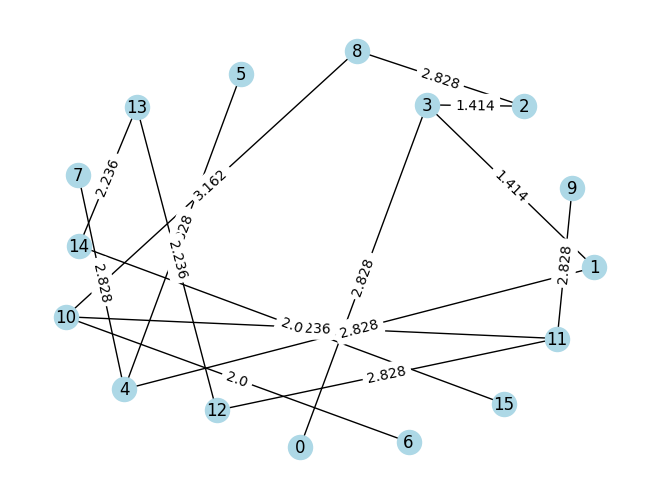

In [72]:
# VISUALIZACION DEL GRAFO INICIAL

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(range(16))
pos = nx.layout.spring_layout(G)

for nodo in grafo.grafo:
    for vecino in grafo.grafo[nodo]:
        G.add_edge(nodo, vecino[0], capacity=vecino[1])
      
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

### 3. Calcular y visualizar la cantidad de cable utilizado en su nueva propuesta


In [75]:
print("\n*Arbol de expansion minima:")
grafoResultado = grafo.PrimMST()


*Arbol de expansion minima:
Arista 	 Costo
3 - 1:  1.414
3 - 2:  1.414
0 - 3:  2.828
1 - 4:  2.828
4 - 5:  2.828
10 - 6:  2.0
4 - 7:  2.828
2 - 8:  2.828
11 - 9:  2.828
8 - 10:  3.162
10 - 11:  2.236
11 - 12:  2.828
12 - 13:  2.236
13 - 14:  2.236
14 - 15:  2.0

Costo total reducido: 36.494


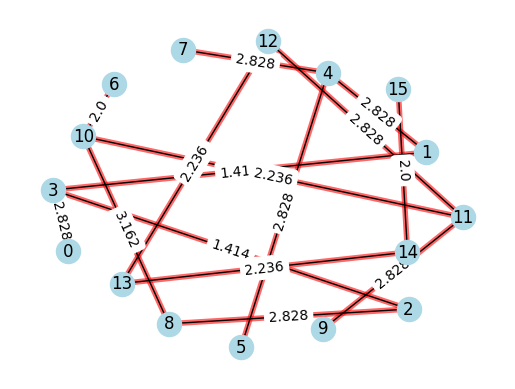

In [78]:
# VISUALIZACION DEL GRAFO FINAL - ARBOL DE EXPANSION MINIMO

G = nx.Graph()
G.add_nodes_from(range(16))
pos = nx.layout.spring_layout(G)

for nodo in grafoResultado:
    for vecino in grafoResultado[nodo]:
        G.add_edge(nodo, vecino[0], capacity=vecino[1])
  
for nodo in grafoResultado:
    for vecino in grafoResultado[nodo]:
         if (nodo, vecino[0]) in G.edges():
             nx.draw_networkx_edges(G, pos, edgelist = [(nodo, vecino[0])],
                                    width = 4.0, alpha = 0.6, edge_color = 'r')

labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()